<a href="https://colab.research.google.com/github/YuruHuang/MenuTracker/blob/main/Results_MenuHealthiness_050522.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I will create all the tables/figures for the mauscript. Specifically,

1. Characterise online menu healthiness 
2. Characterise menu healthiness of all food outlets across the UK 
3. Examine the relationship between area of deprivation and neighborhood menu healthiness 

# 1. Menu healthiness of food outlets on JE 

## Distribution of ratings 

In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# import data 
je_summary = pd.read_csv('JustEat_extracted_220422.csv')
je_summary.head()

,Restaurant ID,Desserts,Vegetables,Salads,Chips,Water,Milk,Special Offers,rest_name,address,...,price_min,price_max,postcode,postcode_district,review,specialOffers,chips,salads,predict,rating2
0,80603,0,5,2,11,1,0,5,Pasha Kebabs & Pizzas,"25 Windmill Brae, Aberdeen, AB11 6HU",...,0.50,11.00,AB11 6HU,AB11,NaN,5,11,2,5.504342,1
1,71703,10,10,2,14,1,0,4,Paco's Tacos,"42-44 Market Street, Aberdeenshire, AB11 5PL",...,0.45,39.99,AB11 5PL,AB11,NaN,4,14,2,5.229788,0
2,6885,0,17,12,1,0,0,2,Dil Se,"Unit 8, The Green Berrymuir Road, Portlethen, ...",...,0.95,47.95,AB12 4UN,AB12,NaN,2,1,12,9.477634,4
3,122605,7,10,6,44,0,0,1,Mannofield Pizza Grill and Kebab,"483a Great Western Road, Aberdeen, AB10 6NN",...,0.80,34.00,AB10 6NN,AB10,NaN,1,15,6,5.541868,1
4,44832,0,17,2,1,0,0,2,Lasan Healthy Indian Brasserie,"Unit 2 Westhill Drive, Westhill, Aberdeenshire...",...,1.00,64.95,AB32 6FS,AB32,NaN,2,1,2,8.479794,3


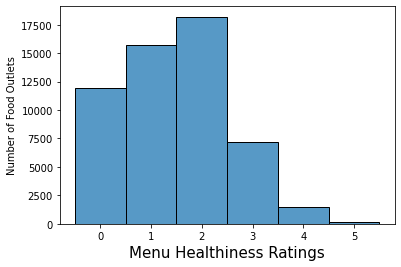

In [ ]:
p = sns.histplot(data= je_summary, x="rating2",discrete=True)
p.set_xlabel("Menu Healthiness Ratings", fontsize = 15)
p.set_ylabel("Number of Food Outlets", fontsize = 10)
plt.savefig('JE_menuhealthiness_distr.png', dpi=300)

In [ ]:
c = je_summary.rating2.value_counts(dropna=False)
p = je_summary.rating2.value_counts(dropna=False, normalize=True)
pd.concat([c,p], axis=1, keys=['counts', '%'])

,counts,%
2,18206,0.333596
1,15700,0.287678
0,11907,0.218177
3,7163,0.131251
4,1465,0.026844
5,134,0.002455


## Distribution of ratings, by cuisine tags 

In [ ]:
# most popular cuisine tags 
from itertools import chain
cuisine_list = list(chain.from_iterable(je_summary.cuisines.str.split(',')))

In [ ]:
Counter(cuisine_list).most_common(20)

[('Pizza', 12332),
 ('Halal', 10636),
 ('Indian', 9045),
 ('Burgers', 7716),
 ('Kebab', 7100),
 ('Chicken', 6390),
 ('Breakfast', 5574),
 ('Curry', 5269),
 ('Chinese', 4662),
 ('Desserts', 3879),
 ('American', 3828),
 ('Italian', 3750),
 ('Fish & Chips', 3682),
 ('Sandwiches', 3477),
 ('Oriental', 2210),
 ('Lunch', 1901),
 ('British', 1646),
 ('Grill', 1213),
 ('Thai', 1192),
 ('Turkish', 1144)]

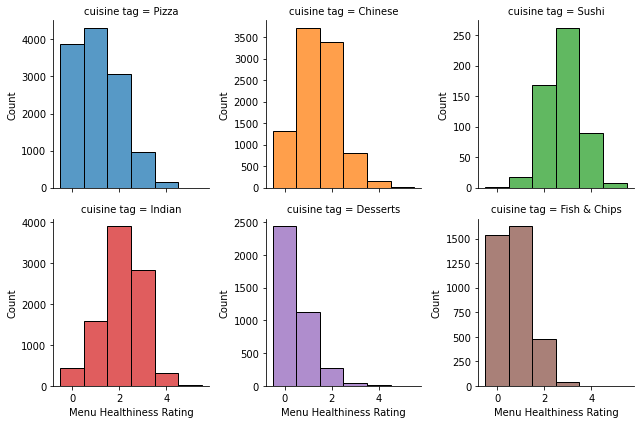

In [ ]:
# Let's compare the menu healthiness ratings of different cuisine tags 
def cat_subset(cuisine_tag):
  food_cat = je_summary[je_summary.cuisines.str.contains(cuisine_tag)]  
  return(food_cat.rating2)

pizza = cat_subset("Pizza")
indian = cat_subset("Indian")
chinese = cat_subset("Chinese")
desserts = cat_subset('Desserts')
british = cat_subset('British')
sushi = cat_subset("Sushi")
chicken = cat_subset("Chicken")
burger = cat_subset("Burger")
fishchips = cat_subset('Fish & Chips')


df = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'Menu Healthiness Rating': pizza, 'cuisine tag': 'Pizza'}),
    pd.DataFrame.from_dict({'Menu Healthiness Rating': chinese, 'cuisine tag': 'Chinese'}),
    pd.DataFrame.from_dict({'Menu Healthiness Rating': sushi, 'cuisine tag': 'Sushi'}),
    pd.DataFrame.from_dict({'Menu Healthiness Rating': indian, 'cuisine tag': 'Indian'}),
    pd.DataFrame.from_dict({'Menu Healthiness Rating': chinese, 'cuisine tag': 'Chinese'}),
    pd.DataFrame.from_dict({'Menu Healthiness Rating': desserts, 'cuisine tag': 'Desserts'}),
    pd.DataFrame.from_dict({'Menu Healthiness Rating': fishchips, 'cuisine tag': 'Fish & Chips'})

])

g = sns.FacetGrid(df, col="cuisine tag", col_wrap=3,hue="cuisine tag",margin_titles=True,
                  sharey=False)
g.map(sns.histplot, "Menu Healthiness Rating",discrete=True)
plt.savefig('JE_menuhealthiness_distr_bycat.png', dpi=300)

# 2. Menu healthiness of predicted scores of all food outlets 

In [ ]:
# read matched data 
import pandas as pd
poi = pd.read_csv('/content/POI_predicted_matchedLSOA.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


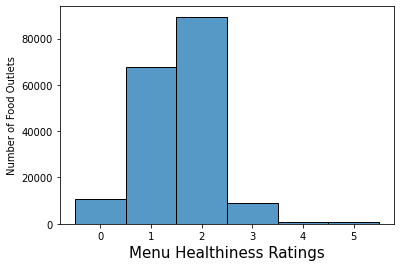

In [ ]:
p = sns.histplot(data= poi, x="rating",discrete=True)
p.set_xlabel("Menu Healthiness Ratings", fontsize = 15)
p.set_ylabel("Number of Food Outlets", fontsize = 10)
plt.savefig('POI_menuhealthiness_distr.png', dpi=300)

In [ ]:
poi.head()

,...1,ref_no,name,pointx_class,feature_easting,feature_northing,pos_accuracy,uprn,topo_toid,topo_toid_version,...,oac11,lat,long,lep1,lep2,pfa,imd,calncv,stp,rating
0,1,18857205.0,Welcome Break (Charnock Richard),1020043,354292.7,415048.2,1,1.112586e-308,osgb1000037990682,8,...,1B1,53.631499,-2.690751,E37000019,NaN,E23000003,22291,E56000018,E54000048,2
1,2,20078819.0,Welcome Break (Hartshead Moor),1020043,416830.0,424112.0,1,0.000000e+00,osgb1000031997248,5,...,1B1,53.714327,-1.746460,E37000062,NaN,E23000010,20304,E56000030,E54000054,2
2,3,18857213.0,Welcome Break (Leicester Forest East),1020043,453839.0,302654.0,1,1.112539e-308,osgb5000005161729586,1,...,6B1,52.619002,-1.206122,E37000021,NaN,E23000021,23065,E56000024,E54000015,2
3,4,18857223.0,Welcome Break (Warwick Northbound),1020043,433887.1,257699.7,1,1.112562e-308,osgb1000017044508,11,...,1A3,52.219853,-1.515881,E37000006,NaN,E23000017,16796,E56000007,E54000018,2
4,5,18857202.0,Welcome Break (Abington),1020043,292990.0,625056.0,1,1.112537e-308,osgb1000036194809,14,...,1A3,55.507502,-3.695989,S99999999,S99999999,S23000009,1908,S99999999,S99999999,2


In [ ]:
poi['pointx_class'].unique()

array([1020043, 1020013, 1020034, 1020018, 1020019, 1020020])

now let's create a new label to group 0018, 0019, and 0020 together. 

    * 0013 Cafes, snack bars and tea rooms
    * 0018 Fast food and takeaway outlets
    * 0019 Fast food delivery services
    * 0020 Fish and chip shops
    * 0034 Pubs, bars and inns
    * 0043 Restaurants


In [ ]:
poi.loc[poi['pointx_class'] == 1020013, 'type'] = 'Cafes and tea rooms'
poi.loc[poi['pointx_class'] == 1020034, 'type'] = 'Pubs, bars and inns'
poi.loc[poi['pointx_class'] == 1020043, 'type'] = 'Restaurants'
poi.loc[poi['pointx_class'].isin([1020018,1020019,1020020]),'type'] = 'Fast food and takeaways'

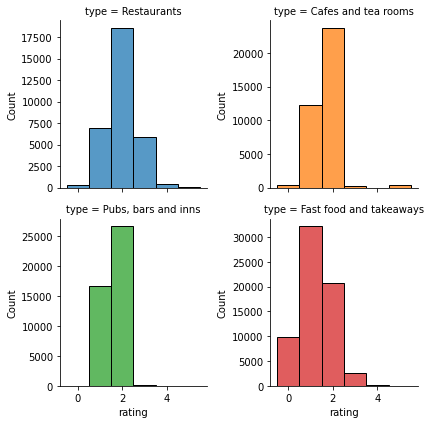

In [ ]:
m = sns.FacetGrid(poi, col="type", hue="type",margin_titles=True,
                  sharey=False,col_wrap=2)
m.map(sns.histplot, "rating",discrete=True)

In [ ]:
medians_to_add = pd.DataFrame(poi.groupby(['type']).predicted_score.median()).reset_index()
medians_to_add = medians_to_add.sort_values('predicted_score',ascending = False)

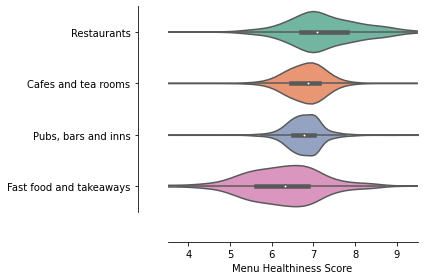

In [ ]:
# Draw a nested boxplot to show bills by day and time
p = sns.violinplot(y="type", x="predicted_score",scale='width',
            data=poi, palette = "Set2", order=['Restaurants','Cafes and tea rooms',
                                            'Pubs, bars and inns','Fast food and takeaways'],
                    bw=0.3)
#sns.despine(offset=10, trim=True)
p.set_xlim(xmin=3.5, xmax=9.5)
p.set(ylabel='', xlabel='Menu Healthiness Score')
# plt.scatter(x='type',y='predicted_score',data= medians_to_add,color='red')
sns.despine(offset=30)
plt.tight_layout()
plt.savefig('ViolinPlot_byType.png',dpi=300)
# plt.xticks(rotation=15)
# plt.text('Restaurants',7.0,'3.2', color='red')

# 3. Menu Healthiness on LSOA level (England)

In [ ]:
!pip install geopandas 
import geopandas as gpd
lsoa_imd = gpd.read_file('https://opendata.arcgis.com/datasets/4ad3e5a10872455eaa67ce4e663d0d01_0.geojson')

     |████████████████████████████████| 1.0 MB 4.2 MB/s 
     |████████████████████████████████| 16.7 MB 357 kB/s 
     |████████████████████████████████| 6.3 MB 22.1 MB/s 


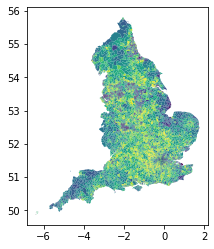

In [ ]:
# Plot the boundaries 
lsoa_imd.plot('IMD_Rank')

now group the menu healthiness data at LSOA level too!

In [ ]:
import numpy as np
lsoa_summary = poi.groupby('lsoa11').agg(total_n = ("ref_no", len),
                                             average_healthiness=('predicted_score','mean'),
                                             median_healthiness = ('predicted_score','median'),
                                             over_0 = ('rating',lambda x: (x > 0).sum()),
                                             over_1 = ('rating',lambda x: (x > 1).sum()),
                                             over_2 = ('rating',lambda x: (x > 2).sum()),
                                             over_3 = ('rating',lambda x: (x > 2).sum()),
                                             IMD = ('imd','mean') #IMD scores should be the same
                                             )
lsoa_summary.head()

,total_n,average_healthiness,median_healthiness,over_0,over_1,over_2,over_3,IMD
lsoa11,,,,,,,,
E01000001,22,7.668697,7.095682,22,17,4,4,29199.0
E01000002,38,7.490187,7.018792,38,26,6,6,30379.0
E01000003,4,7.184360,7.229410,4,3,0,0,14915.0
E01000005,89,7.515362,7.037163,89,74,15,15,8678.0
E01000007,10,6.545637,6.618419,10,5,0,0,7256.0


In [ ]:
lsoa_summary['over_0_percent'] = lsoa_summary['over_0']/lsoa_summary['total_n']
lsoa_summary['over_1_percent'] = lsoa_summary['over_1']/lsoa_summary['total_n']
lsoa_summary['over_2_percent'] = lsoa_summary['over_2']/lsoa_summary['total_n']
lsoa_summary['over_3_percent'] = lsoa_summary['over_3']/lsoa_summary['total_n']

In [ ]:
# create deciles 
lsoa_summary['Menu Healthiness Deciles'] = pd.qcut(lsoa_summary['average_healthiness'], 10,
                               labels = False)

In [ ]:
lsoa_summary['healthiness_rank'] = lsoa_summary['average_healthiness'].rank(method='dense', ascending=False)

In [ ]:
lsoa_imd_menu = lsoa_imd.merge(lsoa_summary, how='left',right_on='lsoa11',left_on='lsoa11cd')

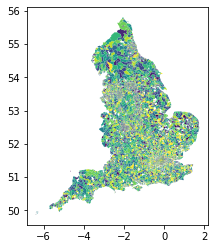

In [ ]:
lsoa_imd_menu.plot('Menu Healthiness Deciles')

In [ ]:
import matplotlib.pyplot as plt

def create_map(col_name, dat, title):
  fig, ax = plt.subplots(1, figsize=(10, 6))
  dat.plot(column=col_name, ax=ax, cmap='Blues',missing_kwds={'color': 'lightgrey'})
  ax.axis('off')
  vmin = dat[col_name].min()
  vmax = dat[col_name].max()
  # Create colorbar
  sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
  sm._A = []
  cbar = fig.colorbar(sm)
  plt.title(title)
  
create_map(col_name='average_healthiness',dat =lsoa_imd_menu, title='Average Menu Healthiness in England, LSOA level')

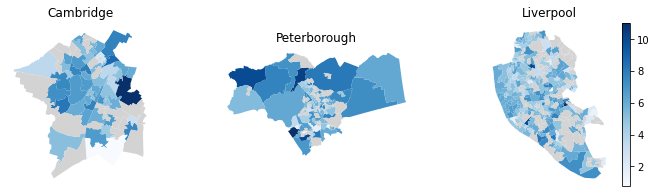

In [ ]:
# now plot Cambridge, Liverpool, and Peterborough
fig, ax = plt.subplots(1,3, figsize=(12, 3),subplot_kw=dict(aspect='equal'))
vmin = lsoa_imd_menu['average_healthiness'].min()
vmax = lsoa_imd_menu['average_healthiness'].max()
areas = ['Cambridge','Peterborough','Liverpool']
# for each panel in the plot 
for i, ax_ in enumerate(ax):
  dat_forplot = lsoa_imd_menu[lsoa_imd_menu['LADnm']==areas[i]]
  dat_forplot.plot(column='average_healthiness', ax=ax_, cmap='Blues',missing_kwds={'color': 'lightgrey'})
  ax_.axis('off')
  ax_.set_title(areas[i])
# Create colorbar
sm = plt.cm.ScalarMappable(cmap='BuPu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
plt.savefig('Locations_LSOA.png')

# Menu Healthiness on the Local Authority level

## poi data (all)

In [ ]:
#!pip install geopandas
import geopandas as gpd
la_b= gpd.read_file('https://services1.arcgis.com/ESMARspQHYMw9BZ9/arcgis/rest/services/Local_Authority_Districts_December_2021_GB_BGC/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson',
                    crs='4326')

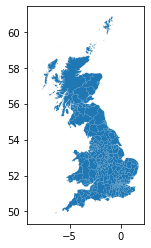

In [ ]:
la_b.plot()

In [ ]:
la_b.head()

,LAD21CD,LAD21NM,LAD21NMW,BNG_E,BNG_N,LONG,LAT,OBJECTID,Shape__Area,Shape__Length,GlobalID,geometry
0,E06000001,Hartlepool,,447160,531474,-1.27018,54.67614,1,9.377150e+07,68370.932528,a0067727-6c25-4d75-bbe3-839cf676a069,"MULTIPOLYGON (((-1.22472 54.62609, -1.22494 54..."
1,E06000002,Middlesbrough,,451141,516887,-1.21099,54.54467,2,5.385857e+07,43639.803302,449ea171-0cf1-4f7e-bfd2-4a204eda5ff3,"MULTIPOLYGON (((-1.27712 54.54791, -1.27720 54..."
2,E06000003,Redcar and Cleveland,,464361,519597,-1.00608,54.56752,3,2.451429e+08,94929.157179,f5a51119-846e-4757-b327-73b4be205345,"MULTIPOLYGON (((-1.20098 54.57763, -1.20037 54..."
3,E06000004,Stockton-on-Tees,,444940,518183,-1.30664,54.55691,4,2.049023e+08,117933.766279,6c7f0974-4974-4793-9d56-56e9fd814184,"MULTIPOLYGON (((-1.27154 54.55378, -1.27197 54..."
4,E06000005,Darlington,,428029,515648,-1.56835,54.53534,5,1.974890e+08,105775.139973,9f91263d-693a-442d-b20d-91a0cd0631bb,"POLYGON ((-1.63800 54.61720, -1.63767 54.61670..."


In [ ]:
la_summary = poi.groupby('laua').agg(average_healthiness=('predicted_score','mean'))
la_summary

,average_healthiness
laua,
E06000001,6.442007
E06000002,6.497497
E06000003,6.560787
E06000004,6.583103
E06000005,6.529655
...,...
W06000020,6.498527
W06000021,6.672342
W06000022,6.652268


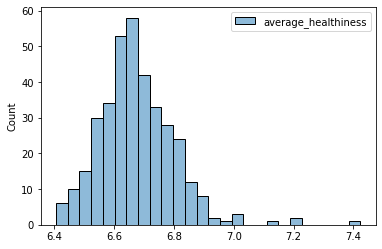

In [ ]:
sns.histplot(la_summary)

In [ ]:
la_menu = la_b.merge(la_summary, how='left',right_on='laua',left_on='LAD21CD')

In [ ]:
la_menu.head()

,LAD21CD,LAD21NM,LAD21NMW,BNG_E,BNG_N,LONG,LAT,OBJECTID,Shape__Area,Shape__Length,GlobalID,geometry,average_healthiness
0,E06000001,Hartlepool,,447160,531474,-1.27018,54.67614,1,9.377150e+07,68370.932528,a0067727-6c25-4d75-bbe3-839cf676a069,"MULTIPOLYGON (((-1.22472 54.62609, -1.22494 54...",6.442007
1,E06000002,Middlesbrough,,451141,516887,-1.21099,54.54467,2,5.385857e+07,43639.803302,449ea171-0cf1-4f7e-bfd2-4a204eda5ff3,"MULTIPOLYGON (((-1.27712 54.54791, -1.27720 54...",6.497497
2,E06000003,Redcar and Cleveland,,464361,519597,-1.00608,54.56752,3,2.451429e+08,94929.157179,f5a51119-846e-4757-b327-73b4be205345,"MULTIPOLYGON (((-1.20098 54.57763, -1.20037 54...",6.560787
3,E06000004,Stockton-on-Tees,,444940,518183,-1.30664,54.55691,4,2.049023e+08,117933.766279,6c7f0974-4974-4793-9d56-56e9fd814184,"MULTIPOLYGON (((-1.27154 54.55378, -1.27197 54...",6.583103
4,E06000005,Darlington,,428029,515648,-1.56835,54.53534,5,1.974890e+08,105775.139973,9f91263d-693a-442d-b20d-91a0cd0631bb,"POLYGON ((-1.63800 54.61720, -1.63767 54.61670...",6.529655


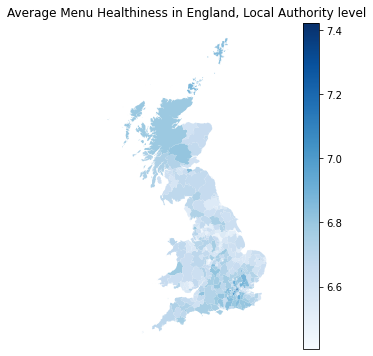

In [ ]:
# absolute healthiness - all quite close 
create_map(col_name='average_healthiness',dat =la_menu, title='Average Menu Healthiness in England, Local Authority level')

In [ ]:
# deciles of rannking
la_menu['Menu Healthiness Deciles'] = pd.qcut(la_menu['average_healthiness'], 10,
                                              labels =['Q1 (the least healthy)','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10 (the most healthy)'])

In [ ]:
!pip install mapclassify

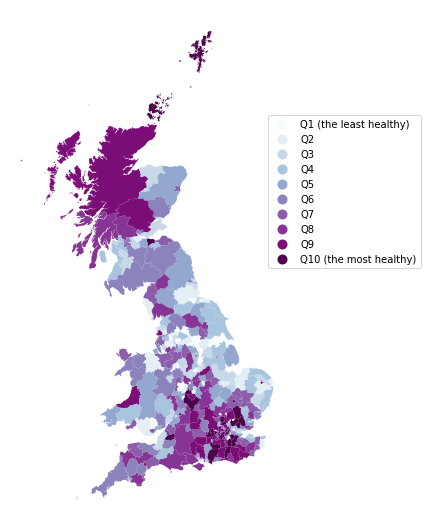

In [ ]:
# create maps with Deciles (not for continous variable)
ax=la_menu.plot(column='Menu Healthiness Deciles', figsize=(5,10),
             cmap='BuPu', legend=True, legend_kwds={'bbox_to_anchor': (1.5, 0.8)})
ax.set_axis_off()
plt.savefig('LA_poi.png',dpi=300,bbox_inches='tight')

In [ ]:
la_menu['Menu Healthiness Quintiles'] = pd.qcut(la_menu['average_healthiness'], 5, labels = ['Q1: 6.40-6.58',
                                                                                             'Q2: 6.58-6.64',
                                                                                             'Q3: 6.64-6.69',
                                                                                             'Q4: 6.69-6.77',
                                                                                             'Q5: 6.77-7.42'])

In [ ]:
la_menu.head()

,LAD21CD,LAD21NM,LAD21NMW,BNG_E,BNG_N,LONG,LAT,OBJECTID,Shape__Area,Shape__Length,GlobalID,geometry,average_healthiness,Menu Healthiness Quintiles
0,E06000001,Hartlepool,,447160,531474,-1.27018,54.67614,1,9.377150e+07,68370.932528,a0067727-6c25-4d75-bbe3-839cf676a069,"MULTIPOLYGON (((-1.22472 54.62609, -1.22494 54...",6.442007,Q1: 6.40-6.58
1,E06000002,Middlesbrough,,451141,516887,-1.21099,54.54467,2,5.385857e+07,43639.803302,449ea171-0cf1-4f7e-bfd2-4a204eda5ff3,"MULTIPOLYGON (((-1.27712 54.54791, -1.27720 54...",6.497497,Q1: 6.40-6.58
2,E06000003,Redcar and Cleveland,,464361,519597,-1.00608,54.56752,3,2.451429e+08,94929.157179,f5a51119-846e-4757-b327-73b4be205345,"MULTIPOLYGON (((-1.20098 54.57763, -1.20037 54...",6.560787,Q1: 6.40-6.58
3,E06000004,Stockton-on-Tees,,444940,518183,-1.30664,54.55691,4,2.049023e+08,117933.766279,6c7f0974-4974-4793-9d56-56e9fd814184,"MULTIPOLYGON (((-1.27154 54.55378, -1.27197 54...",6.583103,Q2: 6.58-6.64
4,E06000005,Darlington,,428029,515648,-1.56835,54.53534,5,1.974890e+08,105775.139973,9f91263d-693a-442d-b20d-91a0cd0631bb,"POLYGON ((-1.63800 54.61720, -1.63767 54.61670...",6.529655,Q1: 6.40-6.58


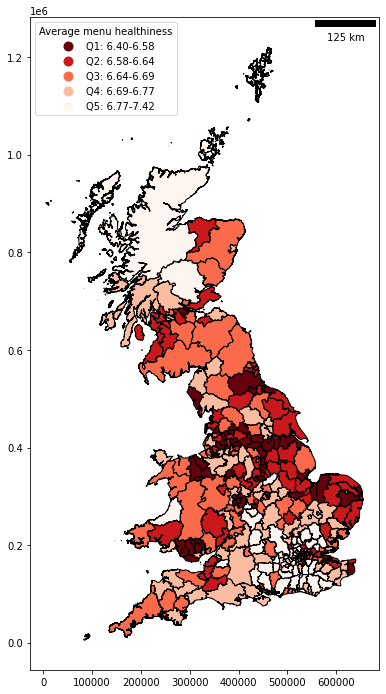

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# !pip install matplotlib-scalebar
from matplotlib_scalebar.scalebar import ScaleBar
la_menu = la_menu.to_crs(27700) 
red_reversed = matplotlib.cm.get_cmap('Reds_r')
ax = la_menu.plot(column='Menu Healthiness Quintiles', figsize=(8,12),
             cmap=red_reversed, legend=True,legend_kwds={'loc': 'upper left'},edgecolor='black')
ax.add_artist(ScaleBar(1))
ax.get_legend().set_title("Average menu healthiness")
plt.savefig('LA_all_je.png',dpi=300,bbox_inches='tight')

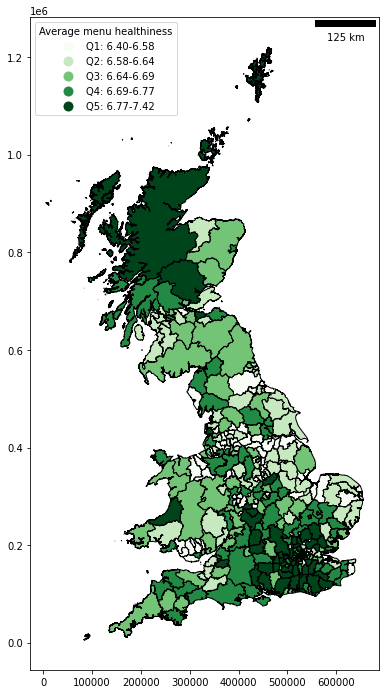

In [ ]:
ax = la_menu.plot(column='Menu Healthiness Quintiles', figsize=(8,12),
             cmap='Greens', legend=True,legend_kwds={'loc': 'upper left'},edgecolor='black')
ax.add_artist(ScaleBar(1))
ax.get_legend().set_title("Average menu healthiness")
plt.savefig('LA_all_je_green.png',dpi=300,bbox_inches='tight')

In [ ]:
# most healthy local authority, least, and median 
la_summary = la_summary.sort_values('average_healthiness')
la_summary.head(), la_summary.tail()

(           average_healthiness
 laua                          
 E09000002             6.405874
 E08000030             6.412149
 E06000012             6.435585
 E07000135             6.437089
 E06000008             6.438316,            average_healthiness
 laua                          
 E09000013             6.996394
 E09000007             7.121481
 E09000020             7.196978
 E09000033             7.222705
 E09000001             7.423356)

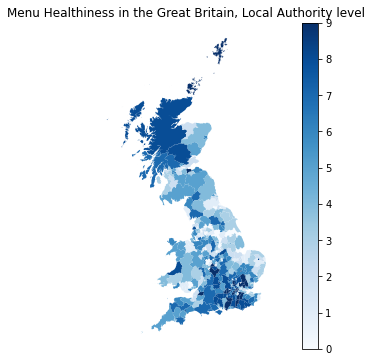

In [ ]:
create_map(col_name='Menu Healthiness Deciles',dat =la_menu, title='Menu Healthiness in the Great Britain, Local Authority level')

In [ ]:
# there is maybe one without matching 
la_menu[la_menu['average_healthiness'].isnull()]

,LAD21CD,LAD21NM,LAD21NMW,BNG_E,BNG_N,LONG,LAT,OBJECTID,Shape__Area,Shape__Length,GlobalID,geometry,average_healthiness


## just eat data 

In [ ]:
je_summary = pd.read_csv('/content/je_predicted_matchedLSOA.csv')

In [ ]:
la_summary_je = je_summary.groupby('laua').agg(average_healthiness=('predict','mean'))
la_summary_je

,average_healthiness
laua,
E06000001,5.937717
E06000002,5.875407
E06000003,5.851892
E06000004,5.843464
E06000005,6.117268
...,...
W06000020,5.953609
W06000021,7.424242
W06000022,6.223866


In [ ]:
la_menu_je = la_b.merge(la_summary_je, how='left',right_on='laua',left_on='LAD21CD')

In [ ]:
# deciles of rannking
la_menu_je['Menu Healthiness Deciles'] = pd.qcut(la_menu_je['average_healthiness'], 10,
                                              labels =['Q1 (the least healthy)','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10 (the most healthy)'])

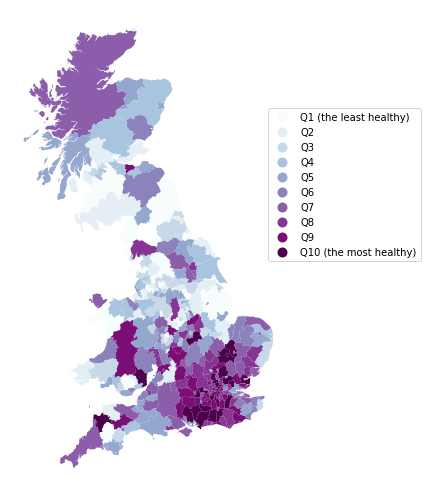

In [ ]:
# create maps with Deciles (not for continous variable)
ax=la_menu_je.plot(column='Menu Healthiness Deciles', figsize=(5,10),
             cmap='BuPu', legend=True, legend_kwds={'bbox_to_anchor': (1.5, 0.8)})
ax.set_axis_off()
plt.savefig('LA_je.png',dpi=300,bbox_inches='tight')

## Combined map (digital & all physical stores)

Combine the two plots with the same legend 

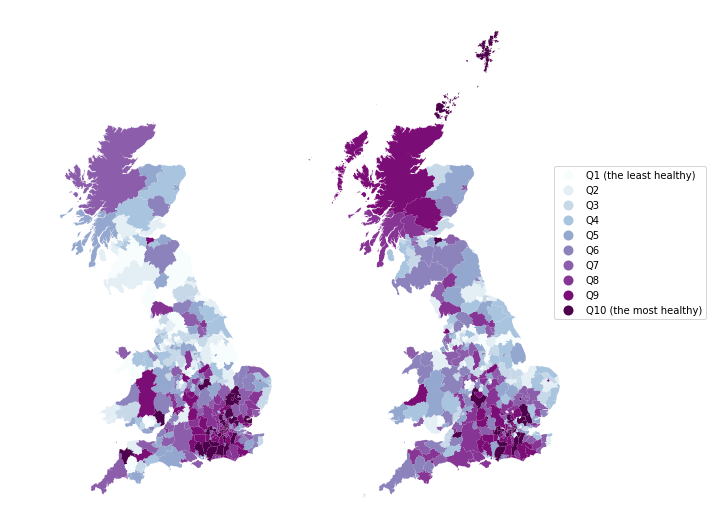

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,20), sharey=True, sharex=True)
fig1 = la_menu_je.plot(column='Menu Healthiness Deciles', ax=axs[0],
             cmap='BuPu')
axs[0].set_axis_off()
la_menu.plot(column='Menu Healthiness Deciles',ax=axs[1], 
             cmap='BuPu',legend=True,legend_kwds={'bbox_to_anchor': (1.5, 0.7)})
axs[1].set_axis_off()
plt.savefig('LA_je_poi.png',dpi=300,bbox_inches='tight')

# Menu Healthiness by type of food outlets 

Using poi predicted scores 

In [ ]:
# normalise the menu healthiness score
def normalize_series(s):
    return (s - s.min()) / (s.max() - s.min())

poi['pred_norm'] = normalize_series(poi['predicted_score'])

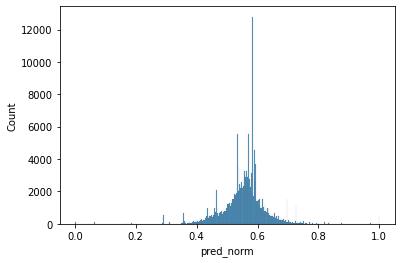

In [ ]:
sns.histplot(poi['pred_norm'])

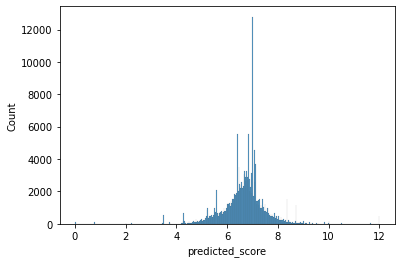

In [ ]:
sns.histplot(poi['predicted_score'])

In [ ]:
la_poi_summary = poi.groupby(['laua','type']).agg(average_healthiness=('predicted_score','mean')).reset_index()

In [ ]:
la_menu_type = la_b.merge(la_poi_summary, how='left',right_on='laua',left_on='LAD21CD')

In [ ]:
for i, col in enumerate(la_poi_summary.type.unique()):
  print(i)
  print(col)

0
Cafes and tea rooms
1
Fast food and takeaways
2
Pubs, bars and inns
3
Restaurants


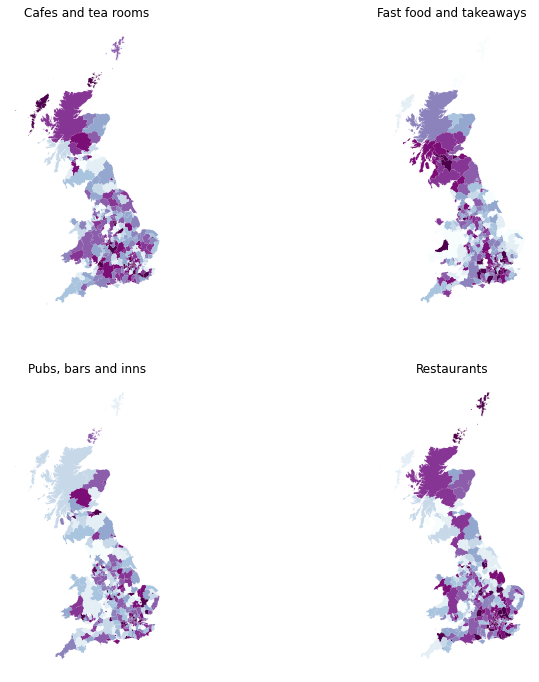

In [ ]:
#!pip install mapclassify

f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start the loop over all the variables of interest
for i, col in enumerate(la_poi_summary.type.unique()):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    dat = la_menu_type[la_menu_type['type']==col]
    dat.plot(column='average_healthiness', ax=ax, k=10, scheme = "quantiles",
                      linewidth=0, cmap='BuPu')
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()

In [ ]:
!pip install mapclassify

# IMD & Menu healthiness

Focus in England only 

In [ ]:
poi.ctry.value_counts()

E92000001    154038
S92000003     15622
W92000004      8266
Name: ctry, dtype: int64

In [ ]:
England_imd = poi[poi['ctry']=='E92000001']

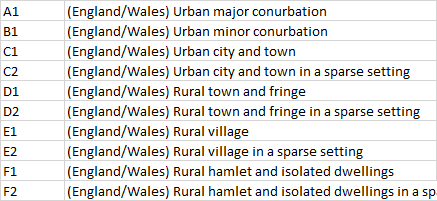

In [ ]:
# Urban rural classification 
England_imd.loc[England_imd['ru11ind'].isin(['A1','B1','C1','C2']), 'urban']='Urban'
England_imd.loc[England_imd['ru11ind'].isin(['D1','D2','E1','E2','F1','F2']), 'urban']= 'Rural'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


## Generalised linear regressions 

### IMD rank as numeric 

In [ ]:
# use IMD as a continous rank 
import statsmodels.formula.api as smf
model_glm = smf.glm(formula='predicted_score~imd+urban',data=England_imd)
model_glm_f =model_glm.fit()
print(model_glm_f.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        predicted_score   No. Observations:               154038
Model:                            GLM   Df Residuals:                   154035
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                         0.85171
Method:                          IRLS   Log-Likelihood:            -2.0621e+05
Date:                Thu, 12 May 2022   Deviance:                   1.3119e+05
Time:                        16:04:52   Pearson chi2:                 1.31e+05
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.5123      0.008    787.

### IMD Deciles 

In [ ]:
# deciles of rannking
England_imd['imd_d'] = pd.qcut(England_imd['imd'], 10,
                                              labels =['Q1 (the most deprived)','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10 (the least deprived)'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
model_glm2 = smf.glm(formula='predicted_score ~ imd_d +urban',data=England_imd)
model_glm_f2 =model_glm2.fit()
print(model_glm_f2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        predicted_score   No. Observations:               154038
Model:                            GLM   Df Residuals:                   154027
Model Family:                Gaussian   Df Model:                           10
Link Function:               identity   Scale:                         0.85019
Method:                          IRLS   Log-Likelihood:            -2.0607e+05
Date:                Thu, 12 May 2022   Deviance:                   1.3095e+05
Time:                        16:15:15   Pearson chi2:                 1.31e+05
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc